# EDA final y gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/winequality-red.csv")

In [3]:
# Traducción de nombres de columnas al español
columnas_en_espanol = {
    'fixed acidity': 'acidez fija',
    'volatile acidity': 'acidez volátil',
    'citric acid': 'ácido cítrico',
    'residual sugar': 'azúcar residual',
    'chlorides': 'cloruros',
    'free sulfur dioxide': 'dióxido de azufre libre',
    'total sulfur dioxide': 'dióxido de azufre total',
    'density': 'densidad',
    'pH': 'pH',  # pH se mantiene igual en español
    'sulphates': 'sulfatos',
    'alcohol': 'alcohol',
    'quality': 'calidad'
}

# Renombramos las columnas utilizando el diccionario
df.rename(columns=columnas_en_espanol, inplace=True)

In [4]:
df.head(3)

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre libre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [5]:
# Revisamos los valores nulos en el DataFrame
df.isnull().sum()

acidez fija                0
acidez volátil             0
ácido cítrico              0
azúcar residual            0
cloruros                   0
dióxido de azufre libre    0
dióxido de azufre total    0
densidad                   0
pH                         0
sulfatos                   0
alcohol                    0
calidad                    0
dtype: int64

## Valores Nulos

In [6]:
# Simulamos algunos valores NaN
np.random.seed(0)  # Semilla para reproducibilidad
df.loc[np.random.choice(df.index, size=10, replace=False), 'pH'] = np.nan

In [7]:
# Revisamos los valores nulos en el DataFrame
df.isnull().sum()

acidez fija                 0
acidez volátil              0
ácido cítrico               0
azúcar residual             0
cloruros                    0
dióxido de azufre libre     0
dióxido de azufre total     0
densidad                    0
pH                         10
sulfatos                    0
alcohol                     0
calidad                     0
dtype: int64

In [8]:
df.shape

(1599, 12)

In [9]:
# Mostrar las filas que tienen valores nulos
filas_nan = df[df.isnull().any(axis=1)]
filas_nan

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre libre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
412,7.1,0.735,0.16,1.90,0.100,15.0,77.0,0.99660,NaN,0.64,9.3,5
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,NaN,0.42,10.0,6
542,9.3,0.715,0.24,2.10,0.070,5.0,20.0,0.99660,NaN,0.59,9.9,5
853,9.3,0.360,0.39,1.50,0.080,41.0,55.0,0.99652,NaN,0.73,10.9,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,NaN,0.63,10.4,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,NaN,0.84,11.7,7
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,NaN,0.53,9.6,5
1054,8.2,0.640,0.27,2.00,0.095,5.0,77.0,0.99747,NaN,0.62,9.1,6
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,NaN,0.76,10.8,6
1189,8.8,0.955,0.05,1.80,0.075,5.0,19.0,0.99616,NaN,0.44,9.6,4


In [10]:
# Imputar los valores vacíos con la media de la columna correspondiente
df['pH'].fillna(df['pH'].mean(), inplace=True)

In [11]:
# Verificación final para asegurar que no hay valores vacíos después del tratamiento
verificacion_final = df.isnull().sum()
verificacion_final

acidez fija                0
acidez volátil             0
ácido cítrico              0
azúcar residual            0
cloruros                   0
dióxido de azufre libre    0
dióxido de azufre total    0
densidad                   0
pH                         0
sulfatos                   0
alcohol                    0
calidad                    0
dtype: int64

## Merge

La característica sintética creada 'interaccion' es el producto del pH y el contenido de alcohol del vino. Esta no es una medida estándar utilizada en la enología, pero podría ser interpretada como un indicador de la interacción entre la acidez del vino (pH) y su fuerza (contenido de alcohol). Por ejemplo, un valor más alto podría indicar un vino con mayor acidez y mayor contenido de alcohol, lo que a su vez podría influir en la percepción del sabor y la textura del vino.

In [12]:
df_synth = pd.read_csv("/content/synthetic_wine_data.csv")

In [13]:
df_synth.head(3)

,calidad,pH,alcohol,interaccion
0,5,3.51,9.4,32.994
1,5,3.20,9.8,31.360
2,5,3.26,9.8,31.948


In [14]:
print(df.shape)
print(df_synth.shape)

(1599, 12)
(1599, 4)


In [15]:
# Revisamos los valores nulos en el DataFrame
df_synth.isnull().sum()

calidad        0
pH             0
alcohol        0
interaccion    0
dtype: int64

In [16]:
# Hacer merge de los dataframes basado en el índice
merged_df = df.merge(df_synth, left_index=True, right_index=True)
print(df.shape)
print(df_synth.shape)
print(merged_df.shape)

(1599, 12)
(1599, 4)
(1599, 16)


In [17]:
merged_df.head(3)

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre libre,dióxido de azufre total,densidad,pH_x,sulfatos,alcohol_x,calidad_x,calidad_y,pH_y,alcohol_y,interaccion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,3.51,9.4,32.994
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5,3.20,9.8,31.360
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5,3.26,9.8,31.948


In [18]:
columns_to_drop = ['calidad_y',	'pH_y', 'alcohol_y']
# Eliminar las columnas del DataFrame
df_final = merged_df.drop(columns=columns_to_drop)
df_final.head(3)

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre libre,dióxido de azufre total,densidad,pH_x,sulfatos,alcohol_x,calidad_x,interaccion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,32.994
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,31.360
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,31.948


In [19]:
# Guardar el DataFrame en un archivo CSV sin el índice
df_final.to_csv("df_limpio", index=False)

## Matplotlib y Seaborn

Histograma: muestra la distribución de la calidad del vino. Los histogramas son útiles para entender la distribución de una única variable y ver con qué frecuencia ocurren diferentes calidades.

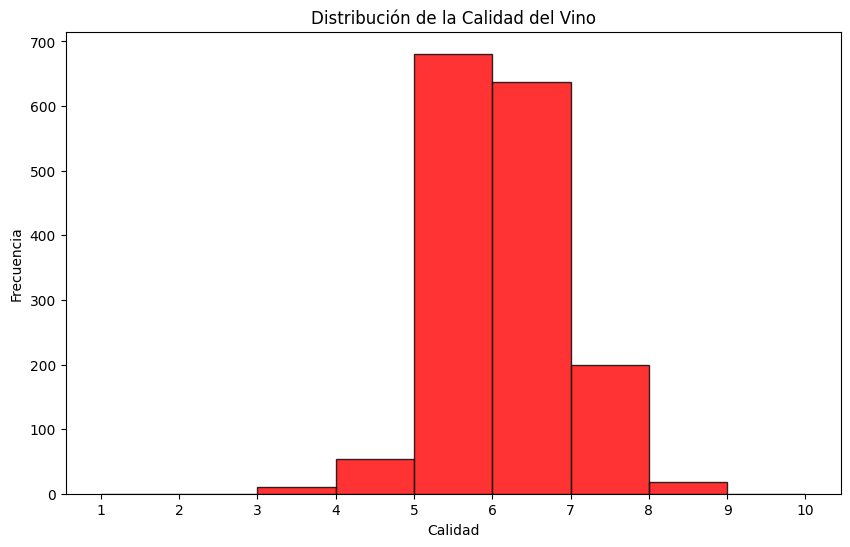

In [20]:
# Histograma de la calidad
plt.figure(figsize=(10, 6))
plt.hist(df_final['calidad_x'], bins=range(1, 11), alpha=0.8, color='red', edgecolor='black')
plt.title('Distribución de la Calidad del Vino')  # Título del gráfico
plt.xlabel('Calidad')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(range(1, 11))  # Establecer las marcas del eje x para las calidades de 1 a 10
plt.show()

La gráfica muestra la distribución de la calidad del vino en un conjunto de datos específico. Aquí hay dos conclusiones que podemos inferir:

1. La mayoría de los vinos en este conjunto de datos tienen una calidad que se califica con un 5 o un 6, lo que indica que la calidad promedio tiende a estar en el rango medio según la escala presentada.

2. La calidad del vino con puntuaciones de 7 o más es significativamente menor en frecuencia en comparación con las puntuaciones medias, lo que sugiere que los vinos de alta calidad son menos comunes en este conjunto de datos. Además, los vinos con puntuación 4 o menos son también raros, lo que podría indicar que los vinos generalmente no tienen una calidad baja según los estándares de esta muestra.

### Histograma del contenido de alcohol:

Muestra la distribución de una variable numérica continua dividiéndola en bins y contando la cantidad de observaciones en cada bin. En este caso, muestra cómo se distribuyen los porcentajes de alcohol en el conjunto de datos del vino.

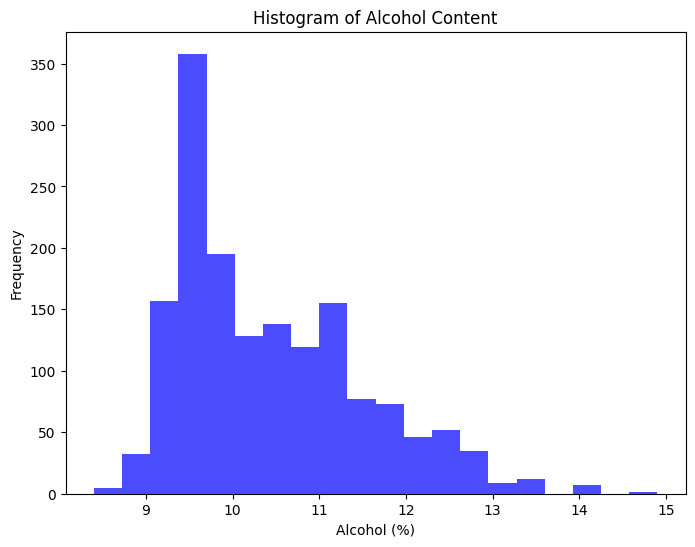

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df_final['alcohol_x'], bins=20, alpha=0.7, color='blue')
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frequency')
plt.show()


La gráfica muestra el histograma del contenido de alcohol en el vino. A partir de esta gráfica, se pueden sacar las siguientes dos conclusiones:

1. La mayoría de los vinos en este conjunto de datos tienen un contenido de alcohol entre el 9% y el 10%. Esto se ve en la barra más alta del histograma, lo que indica la mayor frecuencia de vinos en este rango de contenido de alcohol.

2. Hay una distribución relativamente uniforme de los contenidos de alcohol entre el 10% y el 14%, con una disminución notable en la frecuencia para vinos que contienen más del 13% de alcohol. Esto sugiere que los vinos con un contenido de alcohol muy alto son menos comunes en este conjunto de datos.

### Diagrama de caja de la calidad en función del contenido de alcohol:

Proporciona un resumen visual de una o varias variables numéricas. El diagrama de caja muestra la mediana, los cuartiles y los valores atípicos para cada grupo de calidad

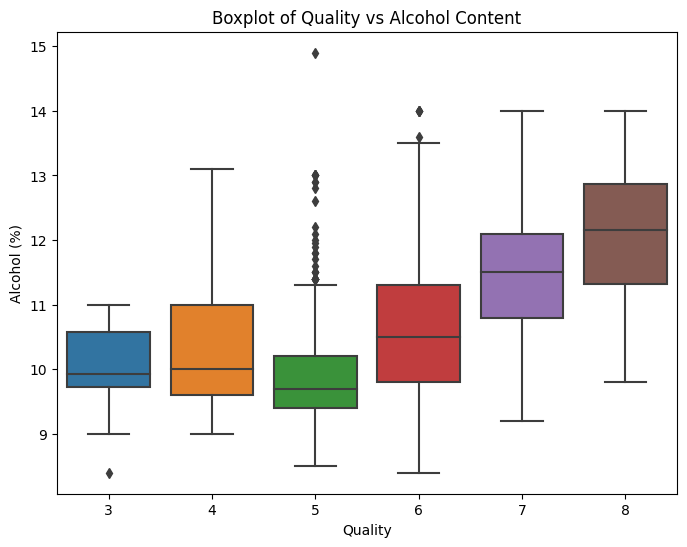

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='calidad_x', y='alcohol_x', data=df_final)
plt.title('Boxplot of Quality vs Alcohol Content')
plt.xlabel('Quality')
plt.ylabel('Alcohol (%)')
plt.show()

La gráfica muestra un diagrama de cajas (boxplot) que relaciona la calidad del vino con su contenido de alcohol. Aquí hay dos conclusiones y su importancia para el aprendizaje automático:

1. Hay una tendencia visible de aumento en la mediana del contenido de alcohol a medida que aumenta la calidad del vino. Los vinos con calidad alta (7 y 8) tienden a tener un mayor contenido de alcohol comparados con los vinos de calidad más baja (3 y 4).

2. Existe una variabilidad considerable en los contenidos de alcohol dentro de cada categoría de calidad, como lo demuestran las longitudes de las cajas y las antenas. Sin embargo, los vinos de calidad más alta tienen menos valores atípicos que los de calidad más baja.

### Gráfico de dispersión de la acidez volátil contra la calidad:

Muestra la relación entre dos variables numéricas. Cada punto representa una observación con su respectiva acidez volátil y valor de calidad.

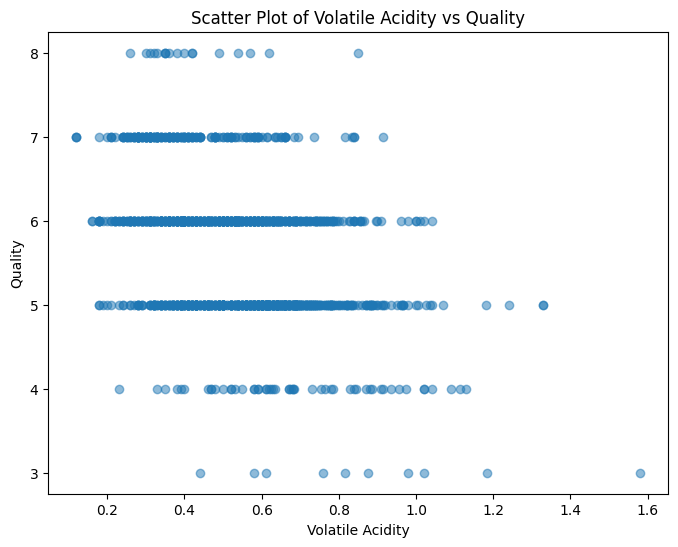

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df_final['acidez volátil'], df_final['calidad_x'], alpha=0.5)
plt.title('Scatter Plot of Volatile Acidity vs Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()


La gráfica muestra un diagrama de dispersión que compara la acidez volátil del vino con su calidad. Aquí hay dos conclusiones y su importancia para el aprendizaje automático:

1. A medida que la acidez volátil aumenta, parece haber una tendencia a la disminución en la calidad del vino. La mayoría de los vinos de mayor calidad (calificaciones de 6 y 7) se concentran en niveles más bajos de acidez volátil.

2. Hay una concentración densa de datos en niveles más bajos de acidez volátil para todas las calidades, con una dispersión más amplia a medida que aumenta la acidez volátil, lo que indica una menor certeza o una relación más débil entre la acidez volátil y la calidad en este rango más alto.

### Mapa de calor de la matriz de correlación

Heatmap: muestra la matriz de correlación de las variables del dataframe. Los heatmaps de correlación son herramientas esenciales en el análisis de datos para identificar relaciones entre características.

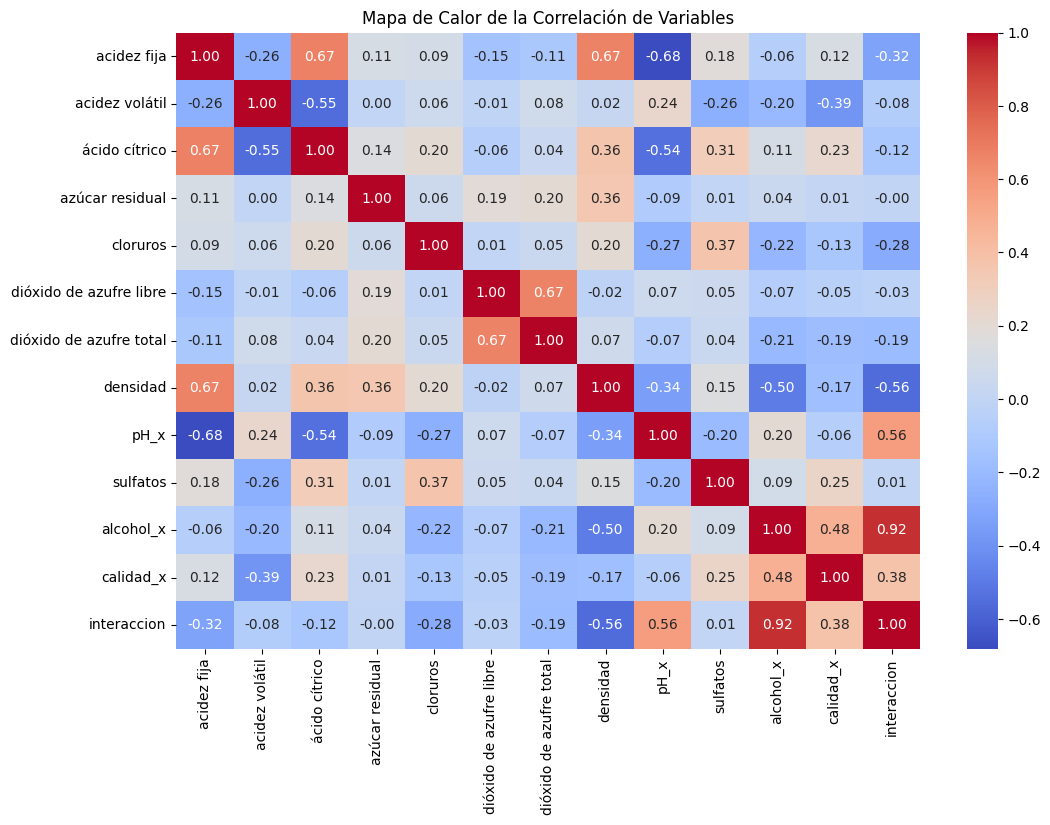

In [22]:
# Heatmap de la correlación entre las variables
plt.figure(figsize=(12, 8))
corr = df_final.corr()  # Calculamos la matriz de correlación
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación de Variables')  # Título del gráfico
plt.show()

Este gráfico muestra un mapa de calor de la correlación de variables, probablemente de un conjunto de datos de vinos, dado los términos utilizados. Aquí hay dos conclusiones importantes que se pueden extraer y su relevancia para el aprendizaje automático:

1. **Alta correlación entre características**: Algunas variables, como la acidez fija y el ácido cítrico, tienen una correlación fuerte y positiva (0.67). Esto es importante en el aprendizaje automático porque la multicolinealidad (alta correlación entre variables predictoras) puede afectar la precisión de los modelos de regresión, ya que puede aumentar la varianza de los coeficientes de regresión, llevando a estimaciones inestables. Por lo tanto, es posible que queramos considerar eliminar o combinar variables correlacionadas antes de entrenar modelos.

2. **Variables poco correlacionadas con la calidad**: La calidad del vino (variable 'calidad_x'), que podría ser nuestra variable objetivo, parece tener correlaciones bajas a moderadas con la mayoría de las otras variables. Esto sugiere que ningún factor por sí solo es un fuerte predictor de la calidad, y un modelo de aprendizaje automático necesitaría considerar múltiples características para hacer predicciones precisas. Además, la correlación más alta con la calidad es con el alcohol (0.48), lo que indica que esta podría ser una característica importante a considerar en el modelo.

### Gráficos de pares de un subconjunto de variables

Se presentan gráficos de dispersión y histogramas de un subconjunto de variables para examinar la relación entre ellas. Además, el color de los puntos puede representar una categoría, como la calidad del vino, para agregar otra dimensión al análisis.

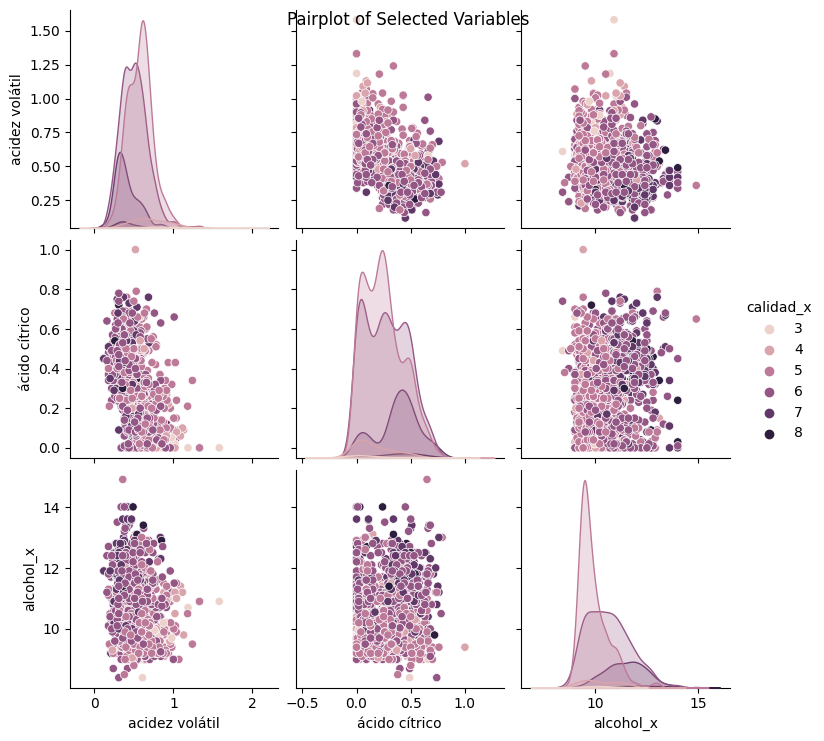

In [26]:
sns.pairplot(df_final[['acidez volátil', 'ácido cítrico', 'alcohol_x', 'calidad_x']], hue='calidad_x')
plt.suptitle('Pairplot of Selected Variables')
plt.show()

Este gráfico muestra la relación bivariada entre las variables acidez volátil, ácido cítrico, alcohol y la calidad del vino, junto con las distribuciones de cada variable en la diagonal.

Relación entre Variables y Calidad: los puntos en los gráficos fuera de la diagonal representan la relación entre dos variables, y el color indica la calidad del vino. Se puede ver que no hay una separación clara de los diferentes niveles de calidad en relación con las otras variables, lo que sugiere que una combinación lineal simple de estas variables puede no ser suficiente para predecir la calidad.